* ref : https://www.kofiabond.or.kr/

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

# 원달러 환율

In [2]:
# USD_KRX = fdr.DataReader('USD/KRW', start='2019-01-01') #미국 달러/한국 원(원달러)
# graph = USD_KRX.loc[:,'Close'].plot()
# graph.axhline(1050, ls='--', color='r')                 #1050선
# graph.axhline(1150, ls='--', color='r')                 #1150선

# 미국 국채금리

In [3]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

# 미국 국채 금리 
DGS = web.DataReader(['DGS20','DGS10','DGS5','DGS1'], 'fred', start, end) # 채권 종류 20년채, 10년채, 5년채, 1년채


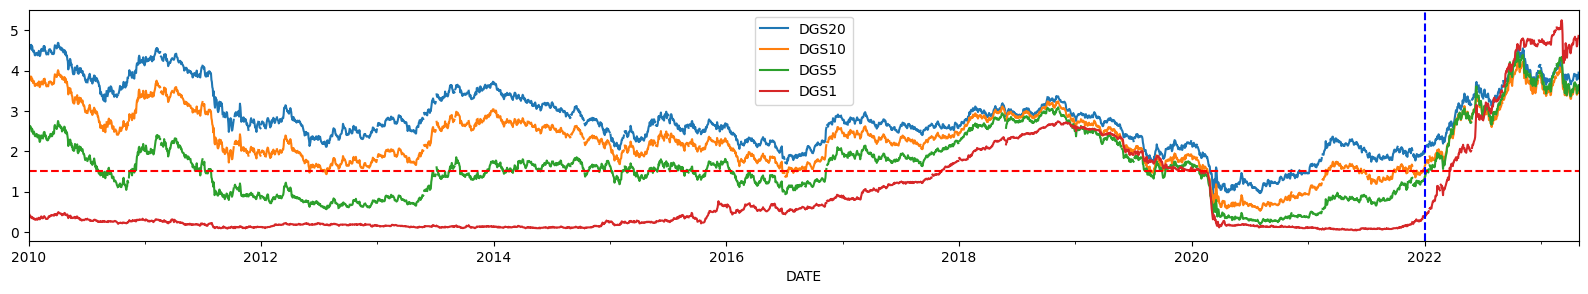

In [4]:
# DGS.info()
graph = DGS.plot()
graph.axhline(1.5, ls='--', color='r')
graph.axvline('2022-01-01', ls='--', color='b')
plt.show()

# 장단기 금리 역전
* 장단기 금리차 = 장기금리(10년물 국채 수익률) – 단기금리(2년물 국채 수익률)
* 금리역전 후 스프레드 격차가 심할 때 금융위기

            T10Y2Y
DATE              
2021-01-01     NaN
2021-01-04    0.82
2021-01-05    0.83
2021-01-06    0.90
2021-01-07    0.94
...            ...
2023-03-27   -0.41
2023-03-28   -0.47
2023-03-29   -0.51
2023-03-30   -0.55
2023-03-31   -0.58

[586 rows x 1 columns]


<AxesSubplot: xlabel='DATE'>

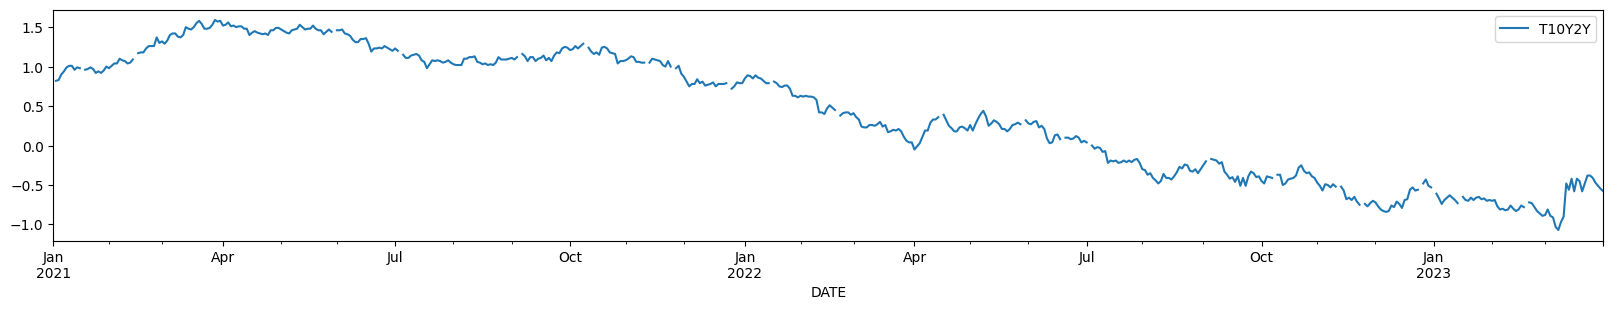

In [7]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2023, 3, 31)

df = web.DataReader('T10Y2Y', 'fred', start, end)
print(df)
df.plot() # 장단기 금리차 큰게 나쁜거

* <b>VIX</b> : 공포지수
<br> - np.sqrt((30일 이평 - S&P500)**2)

* <b>Ted Spread</b> : 미국 공채 금리 - 은행 대출 금리 <br>
            - 시장의 안정성 지표로 활용됨  <br>
            - 차이값이 크면 시장의 변동성이 크다, 위험성이 크다, 불안정하다
* <b>세인트루이스 금융스트레스 지수 (St. Louis Fed Financial Stress Index)</b> : 높으면 위험하다
            - 투자자의 위험 수준을 숫자로 표시(경고수준)

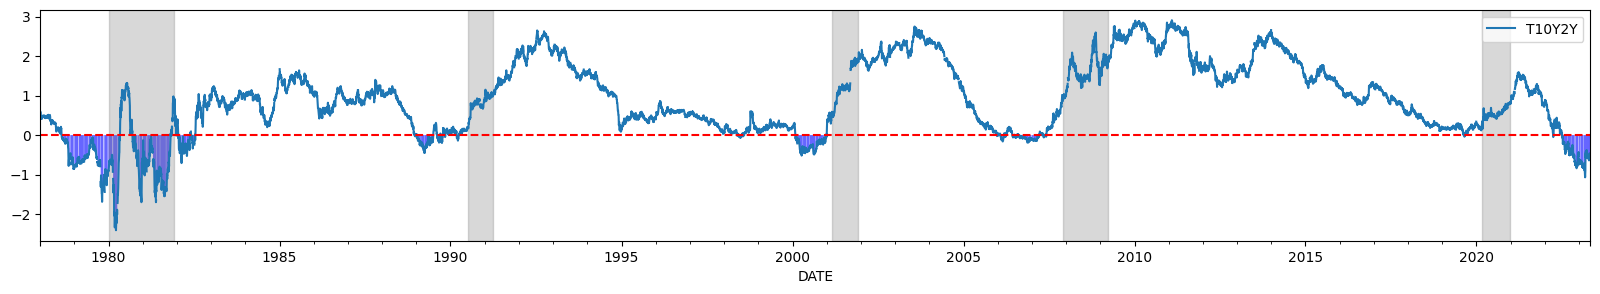

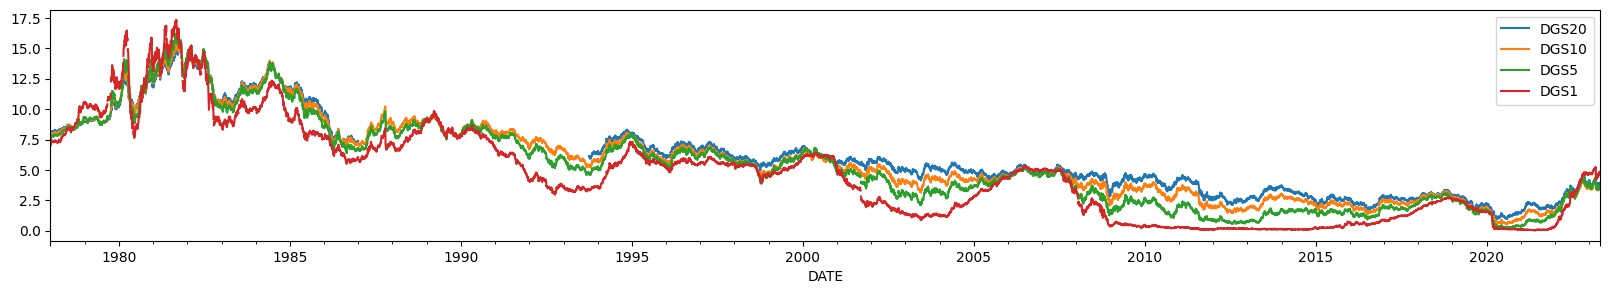

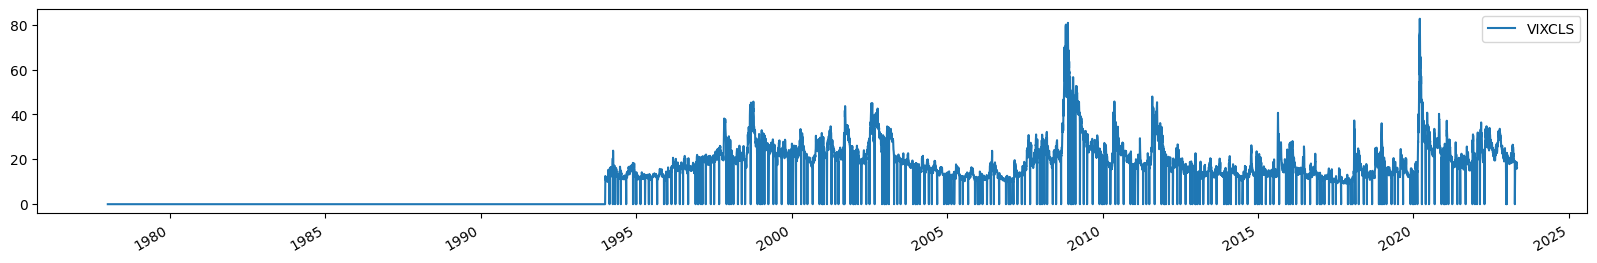

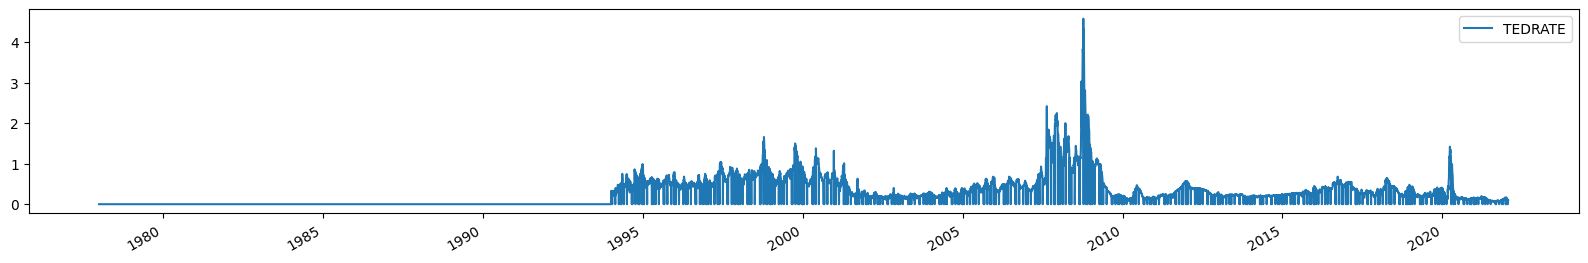

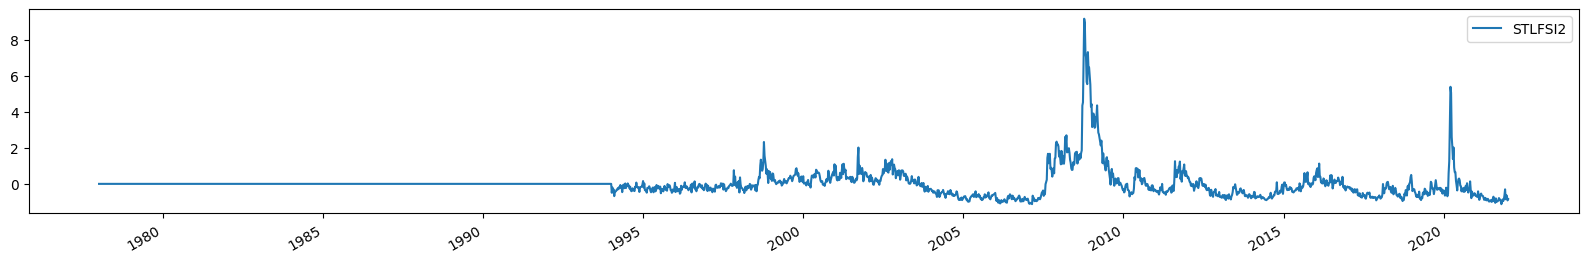

In [6]:
df102 = web.DataReader('T10Y2Y', start='1978-01-01', data_source='fred')
graph= df102.plot()              #장단기 금리차(T10Y2Y) 데이터 가져오기
web.DataReader(['DGS20','DGS10','DGS5','DGS1'], start='1978-01-01', data_source='fred').plot() 

# fdr.DataReader('USD/KRW', start='2019-01-01')#미국 달러/한국 원(원달러)

dummy = pd.DataFrame(index=pd.date_range(start='1978-01-01', end='1993-12-31'))
pd.concat([dummy, web.DataReader('VIXCLS',  start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #VIX(변동성 지수)
pd.concat([dummy, web.DataReader('TEDRATE', start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #TED Spread(금융신용경색)
pd.concat([dummy, web.DataReader('STLFSI2', start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #금융스트레스 지수

graph.axhline(0, ls='--', color='r')   #0선
#graph.fill_between(df102.index, 0, df102['T10Y2Y'], where=df102['T10Y2Y'] > 0, facecolor='r', alpha=0.6, interpolate=True)
graph.fill_between(df102.index, 0, df102['T10Y2Y'], where=df102['T10Y2Y'] <= 0, facecolor='b', alpha=0.6, interpolate=True)

#-----------------------------------------------------------------------------
#경제 위기
#-----------------------------------------------------------------------------
#1929~1933 대공항
#1974오일쇼크
graph.axvspan('1980-01-01', '1981-12-01', color='gray', alpha=0.3) #1980 시장혼란
                                                                   #1987블랙먼데이  
                                                                   #1987년 10월 19일 월요일 다우존스 산업평균지수가 하루만에 22.6%(미국 증시 사상 최대 규모의 하락률)나 떨어진 일
        
graph.axvspan('1990-07-01', '1991-04-01', color='gray', alpha=0.3) #1991미,북유럽,일S&L(저축대부조합)금융기관 도산
                                                                   #1997~아시아부도
graph.axvspan('2001-03-01', '2001-12-01', color='gray', alpha=0.3) #2001닷컴버블,911
graph.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.3) #2008서브프라임모기지사태
graph.axvspan('2020-03-01', '2020-12-30', color='gray', alpha=0.3) #2020코로나
 
plt.show()
# 금리역전 후 스프레드 격차가 심할 때 금융위기